<a href="https://colab.research.google.com/github/c4bath/cf860/blob/main/APTOS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APTOS 2019 Blindness Detection Dataset: Exploratory Data Analysis

Note: Pie Chart Labels Corrected

APTOS: Asia Pacific Tele-Ophthalmology Society)


https://www.kaggle.com/competitions/aptos2019-blindness-detection/data

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR


train_images: 3,662 files (source of all images used)

test_images: 1,928 files (not used here as they are not labeled)

Class labels are in train.csv

In [1]:
# Access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import os
os._exit(00)

In [2]:
# Import libraries
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = '/content/drive/MyDrive/cfPublicData/aptos2/train.csv'

# Read the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [14]:
# Change diagnosis column and values to DR_Grade and descriptions
diagnosis_map = {
    0: 'No DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferative DR'
}

# Map the diagnosis codes to text and create a new column
df['DR_Grade'] = df['diagnosis'].map(diagnosis_map)
df = df.drop(columns=['diagnosis'])


In [15]:
df.head()

,id_code,DR_Grade
0,000c1434d8d7,Moderate
1,001639a390f0,Proliferative DR
2,0024cdab0c1e,Mild
3,002c21358ce6,No DR
4,005b95c28852,No DR


In [16]:
report = ProfileReport(df, title='APTOS DR EDA')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [ ]:
df.describe()

,diagnosis
count,3662.000000
mean,1.126980
std,1.298409
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [ ]:
df.isnull().sum()

id_code      0
diagnosis    0
dtype: int64

In [ ]:
df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

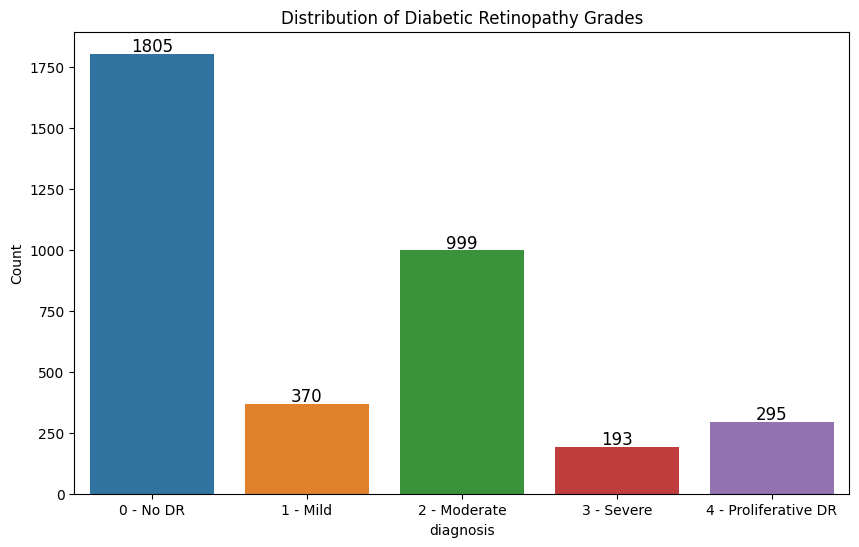

In [ ]:
# Visualization of the class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diabetic Retinopathy Grades')

diagnosis_labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
ax.set_xticklabels(diagnosis_labels)

plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


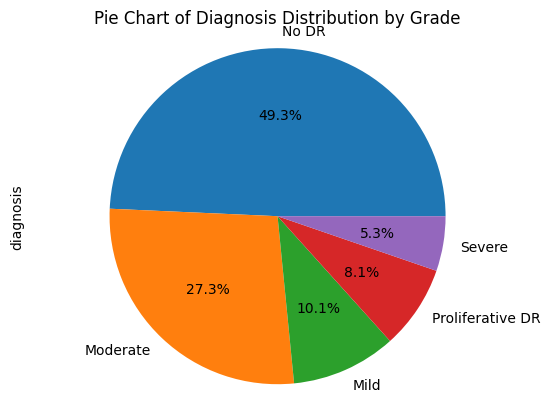

In [ ]:
diagnosis_labels = ['No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe']
df['diagnosis'].value_counts().plot(kind='pie', labels=diagnosis_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Diagnosis Distribution by Grade')
plt.show()

In [ ]:
print("Classes Balance:")
print(df['diagnosis'].value_counts(normalize=True))

Classes Balance:
0    0.492900
2    0.272802
1    0.101038
4    0.080557
3    0.052703
Name: diagnosis, dtype: float64
